# Crawler change

Inspect the effect of the change of the twiqs.nl crawler in June 2020 on the frequencies of words appearing in tweets

In [1]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import clear_output

In [2]:
DATADIR = "/home/erikt/projects/puregome/data/text/"
TEXT = "text"
TWEETCOUNT = "tweetcount"
WORDCOUNT = "wordcount"

In [3]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

In [4]:
def movingAverage(numberList,size):
    newList = []
    for i in range(0,len(numberList)):
        numberUsed = 1
        newList.append(numberList[i])
        for j in range(1,size):
            if i-j >= 0:
                newList[i] += numberList[i-j]
                numberUsed += 1
        newList[i] /= numberUsed
    return(newList)

In [5]:
def search(queryWord,filePattern=""):
    files = sorted([inFileName for inFileName in os.listdir(DATADIR) if re.search(r"-12",inFileName)])
    results = {}
    for inFileName in files:
        if re.search(filePattern,inFileName):
            squeal(queryWord+" "+inFileName)
            df = pd.read_csv(DATADIR+inFileName)
            nbrOfMatches = 0
            for i in range(0,len(df)):
                if re.search(r"\b"+queryWord+r"\b",df.iloc[i][TEXT],flags=re.IGNORECASE): nbrOfMatches += 1
            results[inFileName] = {TWEETCOUNT:len(df),WORDCOUNT:nbrOfMatches}
    return(results)

In [6]:
STOPWORDS = "de het ik een en"
TOPICWORDS = "rivm mondkapje testen thuis vakantie"
MONTH = "202006"

results = {}
for queryWord in STOPWORDS.split():
    results[queryWord] = search(queryWord,filePattern=MONTH)

en 20200630-12.out.gz


/home/erikt/anaconda3/envs/python37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


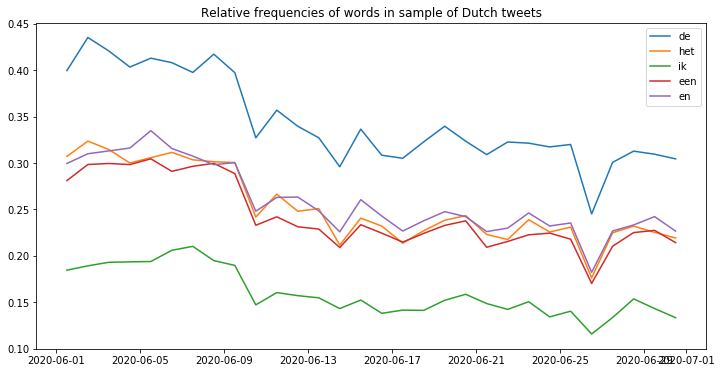

In [7]:
DATEPATTERN = "%Y%m%d-%H.out.gz"

fig,ax = plt.subplots(figsize=(12,6))
for queryWord in STOPWORDS.split():
    ax.plot_date([datetime.strptime(date,DATEPATTERN) for date in results[queryWord]],
                 [results[queryWord][date][WORDCOUNT]/results[queryWord][date][TWEETCOUNT] for date in results[queryWord]],
                 fmt="-",label=queryWord)
plt.title("Relative frequencies of words in sample of Dutch tweets")
plt.legend()
plt.show()